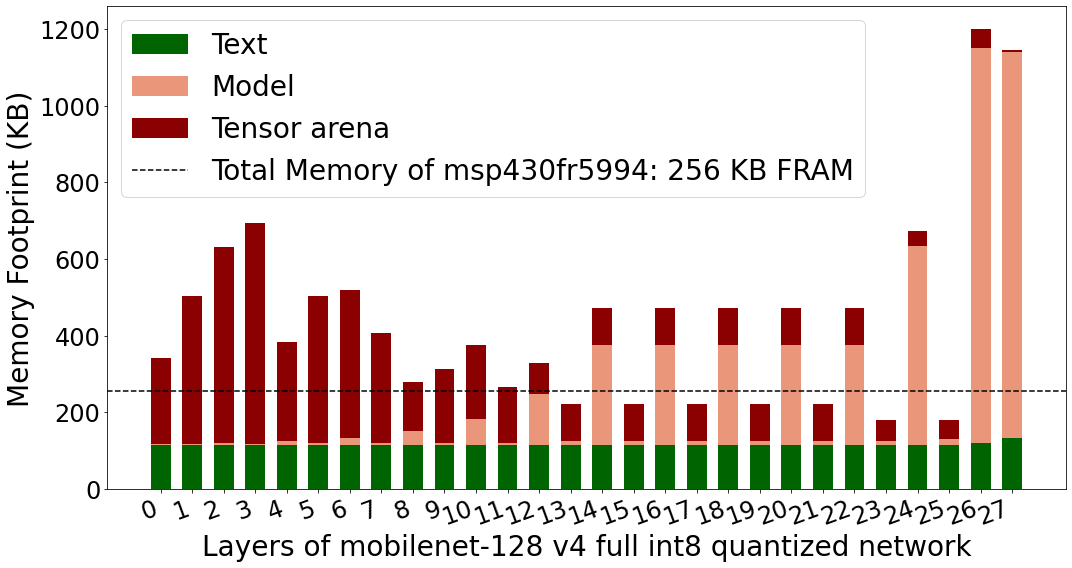

In [ ]:
# Script to plot the mobilenetv4 (resolution: 224*224*3, depthmultiplier=1) layerwise memory breakdown. The baseline model in Benchmarks\Mobilenetv4 was first partitioned layerwise using C++ script developed to partition tensorflow-lite models located inside tensorflow_lite_layerwise_partitioner folder.
# Then each of the 28 layers models located in the zipped folder mobilenetv4_layerwise_models.zip in location Mobilenet_Layerwise_Memory_Breakdown/Mobilenet_v4_layerwise_tflite_models were analyzed for inference memory as discussed below
# Total inference memory for each model had 3 components: model_size (.tflite file size) + arena size (memory needed to store the intermediate tensors including input: It was estimated for each using out arena_estimation.py script located inside tensorflow_lite_arena_estimation folder) 
# + Code size (.text memory estimated by compiling inference code with all the tensorflow lite int8 operators as needed for the mobilenet inference using Code composer studio (CCS) using gcc compiler for msp430fr5994 as shown in the tensorflow_lite_code_estimation_folder )
# To Plot: Stacked bar graph for layerwise memory breakdown of Original LeNet-5 for O3 Compiler and 16 MHz on msp430fr5994
import matplotlib.pyplot as plt
import numpy as np

import matplotlib


# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['text.usetex'] = True


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


#Type = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','']
Type=[]
Text_data=[]
for i in range(28):
    Type.append(i)
    
for i in range(26):
    Text_data.append(114226+4096)

Text_data.append(119024+4096)
Text_data.append(132838+4096)

Model_data=[2681
,2177
,4073
,2609
,10473
,3441
,18665
,3433
,35561
,5105
,68329
,5105
,134889
,8433
,265961
,8433
,265961
,8433
,265961
,8433
,265961
,8433
,265961
,8433
,530153
,15089
,1054689
,1031257]

Tensor_arena=[229788,
 393630,
 524700,
 590238,
 262556,
 393630,
 393628,
 295326,
 131484,
 197022,
 197020,
 147870,
 82332,
 98718,
 98716,
 98718,
 98716,
 98718,
 98716,
 98718,
 98716,
 98718,
 98716,
 57758,
 41372,
 49566,
 49700,
 3792]
    
# # Text_data=[145]*16 # in KB
# Model_data= [4177,4177,4177,4177,2563, 2563, 2563, 2563, 1333, 1333, 1333, 1333, 486, 486, 486, 486] # in KB
# Tensor_arena=[1184.5, 872.4, 608.4, 392.4, 890.4, 656.4, 458.4, 296.4, 596.4, 440.4, 308.4,200.4, 302.4, 224.4, 158.4, 104.4] # in KB
#RAM= [4096]*28 # Using the maximum 4096 Bytes RAM in calculation as Dynamic Memory # in KB
w=0.07
#Test_acc=[88.9, 88.3, 86.7, 84.2, 87.0, 86.4, 83.8, 78.8, 83.2, 82.2, 80.4, 77.7, 72.8, 71.2, 68.5,  64.4]


# ind = np.arange(N) 
ind = np.linspace(1,4,28) 

fig, ax = plt.subplots()
params = {'figure.figsize': [15, 8], 'legend.fontsize': 28} 
plt.rcParams.update(params)


# Convert bytes to KB

Text_data_KB = [i/1024.0 for i in Text_data]
Model_data_KB = [i/1024.0 for i in Model_data]
Tensor_arena_KB = [i/1024.0 for i in Tensor_arena]


# p1=plt.bar(ind, Text_data, width=w, color='darkgreen')
# #p2=plt.bar(ind, RAM, bottom=Text_data, width=w, color='darkblue')
# p3=plt.bar(ind, Model_data, bottom=np.array(Text_data), width=w, color='darksalmon')
# p4=plt.bar(ind, Tensor_arena, bottom=np.array(Model_data)+np.array(Text_data), width=w, color='darkred')



p1=plt.bar(ind, Text_data_KB, width=w, color='darkgreen')
#p2=plt.bar(ind, RAM, bottom=Text_data, width=w, color='darkblue')
p3=plt.bar(ind, Model_data_KB, bottom=np.array(Text_data_KB), width=w, color='darksalmon')
p4=plt.bar(ind, Tensor_arena_KB, bottom=np.array(Model_data_KB)+np.array(Text_data_KB), width=w, color='darkred')


# plt.xlabel('Layers of mobilenetv-128 full int8 quantized network',size=28,fontweight='bold')  
# plt.ylabel('Memory (Bytes) scaled by 1e6',size=28,fontweight='bold')

plt.xlabel('Layers of mobilenet-128 v4 full int8 quantized network',size=28)  
plt.ylabel('Memory Footprint (KB)',size=28)

fig.set_figheight(8)
fig.set_figwidth(15)
#plt.title('Mobilenet v4 layerwise memory breakdown',size=20)
# plt.xticks(ind, Type,rotation=20,ha='right',size=28,fontweight='bold')
# plt.yticks(size=28,fontweight='bold')


plt.xticks(ind, Type,rotation=20,ha='right',size=24)
plt.yticks(size=24)

#plt.legend(prop={'size': 24})

#plt.autoscale(False)
#prop={'size': 50}
a=plt.axhline(y=256, color='black',  linestyle='dashed',label='Total Memory of msp430fr5994 256 KB FRAM + 8 KB SRAM')
plt.legend((p1[0],p3[0], p4[0],a), ('Text','Model','Tensor arena','Total Memory of msp430fr5994: 256 KB FRAM'), loc="upper left")
# ax.yaxis.set_major_locator(plt.MultipleLocator(20000)) 
# ax.yaxis.set_minor_locator(plt.MultipleLocator(10000))
# i=0
# for rs in zip(p1,p2,p3,p4):
#     height = sum([r.get_height() for r in rs])
#     r1 = rs[0]
#     plt.text(r1.get_x()+r1.get_width()/2.+0.01, height, f'{Test_acc[i]:.1f}%', ha = 'center', va='bottom',size=18,fontweight='bold')
#     i=i+1
#ax.ticklabel_format(useOffset=False, style='plain')

#ax.get_yaxis().get_major_formatter().set_scientific(False)
fig.tight_layout()
fig.savefig("Memory_Layerwise_mobilenet.pdf", bbox_inches='tight', dpi=600)
fig.savefig("Memory_Layerwise_mobilenet.png", bbox_inches='tight', dpi=600)
#plt.ylim(0,240000)
plt.show()  





In [ ]:


Text_data_KB


[115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 115.548828125,
 120.234375,
 133.724609375]